<a href="https://colab.research.google.com/github/sajad13901/Statistics_Wasserman/blob/main/Wasserman_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
# Chapter 8, nerve data, Example 8.2
from google.colab import files
import numpy as np
import pandas as pd
from scipy.stats import norm

# uploaded = files.upload()
df = pd.read_csv('https://raw.githubusercontent.com/sajad13901/Statistics_Wasserman/main/nerve.txt', delimiter= '\s+', index_col=False)
data = df.waiting_time
n, mu, sigma = data.size, data.mean(), data.std()

def calc_skew(data):
    n, mu, sigma = data.size, data.mean(), data.std()
    tmp = 0;
    for element in data: tmp += (element - mu)**3
    return tmp/(n * sigma**3)

# use bootstrap to calc variance
skew_boot = []
B = 1000
for _ in range(B):
    tmp_data = np.random.choice(data, size=n, replace=True)
    skew_boot.append(calc_skew(tmp_data))

print('data size:', n)
print('skew_hat:', round(calc_skew(data),2))
print('skew_hat variance:', round(np.std(skew_boot),2))


data size: 799
skew_hat: 1.76
skew_hat variance: 0.16


In [141]:
# Chapter 8, problem 1
import numpy as np
from scipy.stats import norm

LSAT = np.array([576,   635,  558,  578,  666,  580,  555,  661,  651,  605,  653,  575,  545,  572,  594])
GPA  = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96])

def corr(X, Y):
    mu_x = X.mean()
    mu_y = Y.mean()
    return sum((X - mu_x) * (Y - mu_y)) / (sum((X - mu_x)**2) * sum((Y - mu_y)**2))**0.5
  
theta_hat = corr(LSAT, GPA)    
print('estimated theta hat: %.4f' %theta_hat)

# bootstrap to calc variance of theta_hat
n = GPA.size
B = int(1e3)
theta_boot = []
idx_vec = list(range(n))
for _ in range(B):
    sel_idx = np.random.choice(idx_vec, size=n, replace=True)
    sel_gpa = np.take(GPA, sel_idx)
    sel_lsat = np.take(LSAT, sel_idx)
    theta_boot.append(corr(sel_lsat, sel_gpa))
se_hat = np.std(theta_boot)
print('bootstrap standard error: %.4f' %se_hat)

z_95 = norm.ppf(.975)
print('95%% interval Normal method: (%.2f, %.2f)' %(theta_hat-z_95*se_hat, theta_hat+z_95*se_hat))

boot_quant_1 = np.quantile(theta_boot, .05/2)
boot_quant_2 = np.quantile(theta_boot, 1-.05/2)
print('95%% interval Pivotal method: (%.2f, %.2f)' %(2*theta_hat-boot_quant_2, 2*theta_hat-boot_quant_1))

print('95%% interval Percentile method: (%.2f, %.2f)' %(boot_quant_1, boot_quant_2))

estimated theta hat: 0.5459
bootstrap standard error: 0.1938
95% interval Normal method: (0.17, 0.93)
95% interval Pivotal method: (0.16, 0.86)
95% interval Percentile method: (0.23, 0.93)


In [142]:
# Chapter 8, problem 2
import numpy as np
from scipy.stats import norm

n = 50
y = np.random.normal(0, 1, n)
x = np.exp(y)

def calc_skew(data):
    n, mu, sigma = data.size, data.mean(), data.std()
    tmp = 0;
    for element in data: tmp += (element - mu)**3
    return tmp/(n * sigma**3)

t_hat = calc_skew(x)

t_boot = []
B = 10000
for _ in range(B):
  sel_data = np.random.choice(x, size=n, replace=True)
  t_boot.append(calc_skew(sel_data))

se_hat = np.std(t_boot)
print('bootstrap standard error: %.4f' %se_hat)

z_95 = norm.ppf(.975)
print('95%% interval Normal method: (%.2f, %.2f)' %(t_hat-z_95*se_hat, t_hat+z_95*se_hat))

boot_quant_1 = np.quantile(t_boot, .05/2)
boot_quant_2 = np.quantile(t_boot, 1-.05/2)
print('95%% interval Pivotal method: (%.2f, %.2f)' %(2*t_hat-boot_quant_2, 2*t_hat-boot_quant_1))
print('95%% interval Percentile method: (%.2f, %.2f)' %(boot_quant_1, boot_quant_2))


bootstrap standard error: 1.1126
95% interval Normal method: (1.95, 6.31)
95% interval Pivotal method: (2.64, 7.13)
95% interval Percentile method: (1.13, 5.62)


In [156]:
# Chapter 8, problem 3
import numpy as np
from scipy.stats import norm
from scipy.stats import t

n = 25
x = t.rvs(3, size=n)

def T(x):
    return (np.quantile(x, 0.75) - np.quantile(x, 0.25)) / 1.34

B = 10000
t_boot = np.empty(B)
for i in range(B):
  sel_data = np.random.choice(x, size=n, replace=True)
  t_boot[i] = T(sel_data)

alpha = 0.05
t_hat = T(x)
se_hat = np.std(t_boot)
z_alpha = norm.ppf(1 - alpha/2)
boot_quant_1 = np.quantile(t_boot, alpha/2)
boot_quant_2 = np.quantile(t_boot, 1 - alpha/2)
print('95%% interval Normal method: (%.2f, %.2f)' %(t_hat-z_alpha*se_hat, t_hat+z_alpha*se_hat))
print('95%% interval Pivotal method: (%.2f, %.2f)' %(2*t_hat-boot_quant_2, 2*t_hat-boot_quant_1))
print('95%% interval Percentile method: (%.2f, %.2f)' %(boot_quant_1, boot_quant_2))


95% interval Normal method: (0.52, 1.42)
95% interval Pivotal method: (0.53, 1.46)
95% interval Percentile method: (0.49, 1.42)


95% interval Normal method: (137.46, 156.01)


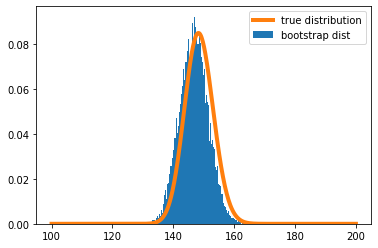

In [199]:
# Chapter 8, problem 6
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 5
n = 1000
x = np.random.normal(mu, 1, n)

B = 10000
t_boot = np.empty(B)
for i in range(B):
  sel_data = np.random.choice(x, size=n, replace=True)
  t_boot[i] = np.exp(sel_data.mean())

t_hat = np.exp(x.mean())
se_hat = np.std(t_boot)
z_alpha = norm.ppf(1 - 0.05/2)
print('95%% interval Normal method: (%.2f, %.2f)' %(t_hat-z_alpha*se_hat, t_hat+z_alpha*se_hat))

# true ditribution of theta_hat = (1/y) * f_x_bar(log(y)) , f_x_bar = Norm(mu, var_x/n)  
def norm_dist(y, mu, var):
  return np.exp(-(y-mu)**2/(2*var))/(var*2*np.pi)**0.5

y = np.linspace(100, 200, 500)
f_y = (1/y) * norm_dist(np.log(y), mu, 1/n)

plt.hist(t_boot, 100, density=True, label='bootstrap dist')
plt.plot(y, f_y, lw=4, label='true distribution')
plt.legend(loc='upper right')
plt.show()


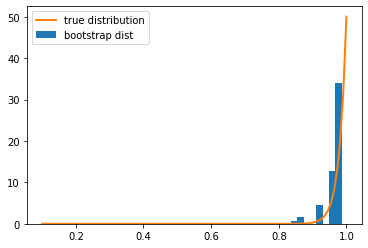

In [223]:
# Chapter 8, problem 7, part a
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 50
theta = 1
x = np.random.uniform(0, theta, n)

B = 10000
t_boot = np.empty(B)
for i in range(B):
  sel_data = np.random.choice(x, size=n, replace=True)
  t_boot[i] = np.max(sel_data)

# true ditribution of theta_hat, find in Q2 of chapter 6 
y = np.linspace(0.1, theta, 100)
f_y = (n/theta**n) * y**(n-1) 

plt.hist(t_boot, 10, density=True, label='bootstrap dist')
plt.plot(y, f_y, lw=2, label='true distribution')
plt.legend(loc='upper left')
plt.show()
